<a href="https://colab.research.google.com/github/Angelgz011/estadistica2/blob/main/eii_u2_03_22150429.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Angelgz011/estadistica2/refs/heads/main/Churn_Modelling.csv")
df.dropna(inplace=True)

df.drop(columns = ["RowNumber", "CustomerId", "Surname"], inplace = True)
df



,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...
9997,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
modelo = smf.ols('EstimatedSalary ~ C(Geography)',data = df ).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova


,df,sum_sq,mean_sq,F,PR(>F)
C(Geography),2.0,3.782055e+09,1.891028e+09,0.571689,0.56459
Residual,9995.0,3.306138e+13,3.307792e+09,NaN,NaN


In [7]:
df.drop(columns = ['Geography'], inplace = True)
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...
9997,709,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
modelo = smf.ols('EstimatedSalary ~ C(Gender)',data = df ).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Gender),1.0,2.021718e+09,2.021718e+09,0.611227,0.434345
Residual,9996.0,3.306314e+13,3.307637e+09,NaN,NaN


In [9]:
df.drop(columns = ['Gender'], inplace = True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...
9997,709,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,28.0,4,130142.79,1,1.0,0.0,38190.78,0


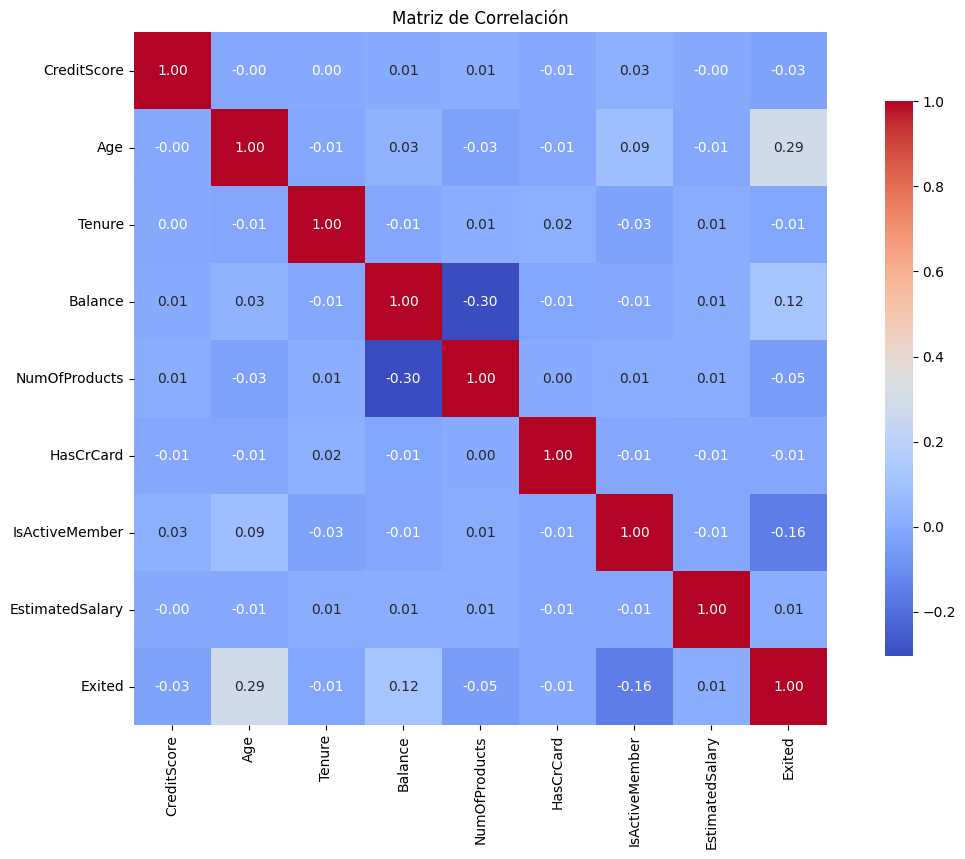

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

matriz_de_correlación = df.corr()
plt.figure(figsize = (15,9))
sns.heatmap(matriz_de_correlación, annot = True, cmap = 'coolwarm', fmt = "0.2f", square= True, cbar_kws = {'shrink': 0.8})
plt.title('Matriz de Correlación')
plt.show()


Coeficiente de determinación: -0.0039
Coeficiente de correlación:  0.0000
Un coeficiente de correlación de 0.0 indica que no existe ningun tipo de relación entre las variables.


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...
9997,709,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,28.0,4,130142.79,1,1.0,0.0,38190.78,0


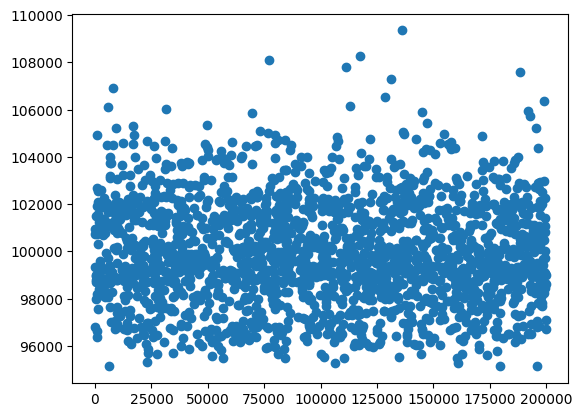

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm

X = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember']]
Y = df['EstimatedSalary']

X_train, X_test,  Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

X_train_constante = sm.add_constant(X_train)
X_test_constante = sm.add_constant(X_test)

modelo = sm.OLS(Y_train, X_train_constante).fit()

Yc = modelo.predict(X_test_constante)

plt.scatter(Y_test,Yc)

r2 = r2_score(Y_test, Yc)
print(f'Coeficiente de determinación: {r2: 0.4f}')

coeficiente_de_correlación  = r2**2
print(f'Coeficiente de correlación: {coeficiente_de_correlación: 0.4f}')
print("Un coeficiente de correlación de 0.0 indica que no existe ningun tipo de relación entre las variables.")
df


In [17]:
b0,b1,b2,b3,b4,b5,b6,b7 = modelo.params
fun = lambda x1,x2,x3,x4,x5,x6,x7: b0 + b1 * x1 + b2 * x2 + b3 * x3 + b4 * x4 + b5 * x5 + b6 * x6 + b7 * x7
fun(730, 30, 6, 10000, 1, 1, 1)


96638.8379139809

In [19]:
from statsmodels.formula.api import ols
modelo_2 = ols('EstimatedSalary ~ CreditScore+Age+Tenure+Balance+NumOfProducts+HasCrCard+IsActiveMember', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_2, typ = 2)
tabla_anova


,sum_sq,df,F,PR(>F)
CreditScore,6.997193e+07,1.0,0.021158,0.884351
Age,1.186456e+09,1.0,0.358767,0.549206
Tenure,1.943219e+09,1.0,0.587601,0.443367
Balance,1.050424e+10,1.0,3.176325,0.074743
NumOfProducts,1.191605e+10,1.0,3.603238,0.057696
HasCrCard,3.365491e+09,1.0,1.017675,0.313096
IsActiveMember,3.527535e+09,1.0,1.066674,0.301723
Residual,3.303734e+13,9990.0,NaN,NaN
